# Лаболаторная работа №2. 
Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

# Задание:
1.Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)<br>
2.Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:<br>
2.1 Обработку пропусков в данных;<br>
2.2 Кодирование категориальных признаков;<br>
2.3 Масштабирование данных.<br>

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [21]:
data = pd.read_csv('../DataSets/BlackFriday.csv', sep=",")

In [22]:
data.shape
# размер набора данных

(537577, 12)

In [23]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 537577


In [24]:
# Первые 5 строк датасета
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [25]:
# типы колонок
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [26]:
#Определим пропущенные значения:
col_with_missing_values = []
for col in data.columns:
    if data[col].isnull().sum() > 0:
        col_with_missing_values.append(col)
        percent = round((data[col].isnull().sum()/total_count)*100,2)
        print("В колонке \"{0}\" ({1}) пропущенно {2}% значений.".format(col,data[col].dtype ,percent))

В колонке "Product_Category_2" (float64) пропущенно 31.06% значений.
В колонке "Product_Category_3" (float64) пропущенно 69.44% значений.


<b><h2>1.Обработка пропусков в данных</h2></b>
<h4>1.1. Простые стратегии - удаление или заполнение нулями</h4>

In [27]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((537577, 12), (537577, 10))

In [28]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((537577, 12), (164278, 12))

In [29]:
# Заполнение всех пропущенных значений нулями
# Категориальные признаки не затронуты...
data_new_3 = data.fillna(0)
data_new_3.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


<h4>1.2. "Внедрение значений" - импьютация (imputation)</h4>
<h4>1.2.1. Обработка пропусков в числовых данных</h4>

In [30]:
#Колонки с пропущенными значениями:
data_miss = data[col_with_missing_values]
data_miss[0:25]

,Product_Category_2,Product_Category_3
0,NaN,NaN
1,6.0,14.0
2,NaN,NaN
3,14.0,NaN
4,NaN,NaN
5,2.0,NaN
6,8.0,17.0
7,15.0,NaN
8,16.0,NaN
9,NaN,NaN


<h5>Заполним пропущенные данные в "Product_Category_2" с помощью "most_frequent"</h5>

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator


si = SimpleImputer(strategy='most_frequent')
data_miss_with_most_frequent = si.fit_transform(data_miss[[col_with_missing_values[0]]])
data_miss_with_most_frequent[0:25]

array([[ 8.],
       [ 6.],
       [ 8.],
       [14.],
       [ 8.],
       [ 2.],
       [ 8.],
       [15.],
       [16.],
       [ 8.],
       [11.],
       [ 8.],
       [ 8.],
       [ 2.],
       [ 8.],
       [ 5.],
       [ 3.],
       [14.],
       [14.],
       [ 5.],
       [14.],
       [ 8.],
       [ 8.],
       [ 8.],
       [ 8.]])

<H4>1.2.2. Обработка пропусков в категориальных данных</H4>

In [32]:
#Добаваим новый датасет с пропусками в категориальных данных
data_categorial = pd.read_csv('../DataSets/Population_of_TownsVillages_of_SagarDistrict.csv', sep=",")

In [33]:
data_categorial.head()

,Id,Tehsil,Type,Name,Population
0,1,Sagar,Town,Sagar Municipal Corporation,274556
1,2,Sagar,Town,Sagar Cantt Cantonment Board,40513
2,3,Sagar,Town,Rajakhedi Census Town,24232
3,4,Sagar,Town,Makronia Buzurg Census Town,23861
4,5,Sagar,Town,Shahpur Nagar Panchayat,13668


In [34]:
#Определим пропущенные значения:
total_count_categorial = data_categorial.shape[0]
print("Всего значений: {}".format(total_count_categorial))
col_with_missing_values = []
for col in data_categorial.columns:
    if data_categorial[col].isnull().sum() > 0:
        col_with_missing_values.append(col)
        percent = round((data_categorial[col].isnull().sum()/total_count_categorial)*100,2)
        print("В колонке \"{0}\" ({1}) пропущенно {2}% значений.".format(col,data_categorial[col].dtype ,percent))

Всего значений: 1921
В колонке "Type" (object) пропущенно 23.63% значений.


In [35]:
data_miss_categorial = data_categorial[col_with_missing_values]
data_miss_categorial.head(10)

,Type
0,Town
1,Town
2,Town
3,Town
4,Town
5,Town
6,Town
7,Town
8,NaN
9,Town


<h5>Заполним пропущенные данные в "Type" с помощью "most_frequent" и константы</h5>

In [42]:
# Импьютация наиболее частыми значениями
si2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_miss_categorial_most_frequent = si2.fit_transform(data_miss_categorial)
data_miss_categorial_most_frequent[0:10]

array([['Town'],
       ['Town'],
       ['Town'],
       ['Town'],
       ['Town'],
       ['Town'],
       ['Town'],
       ['Town'],
       ['Village'],
       ['Town']], dtype=object)

In [43]:
si3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='No type')
data_miss_categorial_constant = si3.fit_transform(data_miss_categorial)
data_miss_categorial_constant[0:10]

array([['Town'],
       ['Town'],
       ['Town'],
       ['Town'],
       ['Town'],
       ['Town'],
       ['Town'],
       ['Town'],
       ['No type'],
       ['Town']], dtype=object)

<b><h2>2. Преобразование категориальных признаков в числовые</h2></b>
<h3>2.1. Кодирование категорий целочисленными значениями - label encoding</h3>

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
data_miss_categorial_most_frequent_with_head = pd.DataFrame({'c1':data_miss_categorial_most_frequent.T[0]})
data_miss_categorial_most_frequent_with_head.head(10)

,c1
0,Town
1,Town
2,Town
3,Town
4,Town
5,Town
6,Town
7,Town
8,Village
9,Town


In [46]:
labelEncoder = LabelEncoder()
code_LE_data_categorial = labelEncoder.fit_transform(data_miss_categorial_most_frequent_with_head["c1"])
np.unique(code_LE_data_categorial)

array([0, 1])

In [47]:
data_miss_categorial_most_frequent_with_head["c1"].unique()

array(['Town', 'Village'], dtype=object)

In [48]:
labelEncoder.inverse_transform([0, 1])

array(['Town', 'Village'], dtype=object)

<h3>2.2. Кодирование категорий наборами бинарных значений</h3>

In [49]:
from sklearn.preprocessing import OneHotEncoder
oneHotEncoder = OneHotEncoder()
code_OHE_data_categorial = oneHotEncoder.fit_transform(data_miss_categorial_most_frequent_with_head[["c1"]])
code_OHE_data_categorial.todense()[0:10]

matrix([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.]])

In [50]:
data_miss_categorial_most_frequent_with_head.head(10)

,c1
0,Town
1,Town
2,Town
3,Town
4,Town
5,Town
6,Town
7,Town
8,Village
9,Town


<H3>2.3. Pandas get_dummies - быстрый вариант one-hot кодирования</H3>

In [51]:
pd.get_dummies(data_miss_categorial_most_frequent_with_head).head(10)

,c1_Town,c1_Village
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,0,1
9,1,0


<H1>3. Масштабирование данных</H1>

<h3>3.1. MinMax масштабирование</h3>

D:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


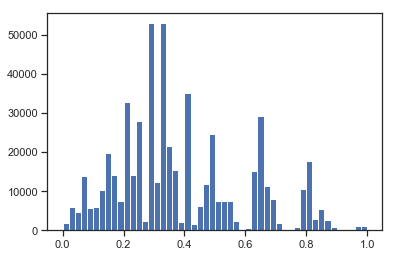

In [52]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
sc1 = MinMaxScaler()
plt.hist(sc1.fit_transform(data[["Purchase"]]),50)
plt.show()

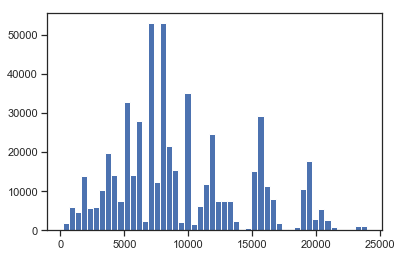

In [54]:
plt.hist(data["Purchase"], 50)
plt.show()

<h3>3.2. Масштабирование данных на основе Z-оценки - StandardScaler</h3>

D:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


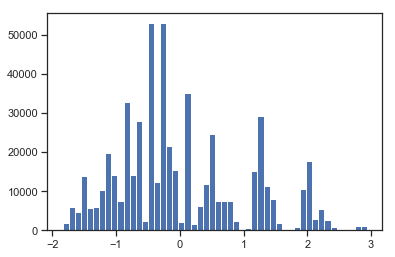

In [58]:
sc2 = StandardScaler()
plt.hist(sc2.fit_transform(data[['Purchase']]),50)
plt.show()

<h3>3.3. Нормализация данных</h3>

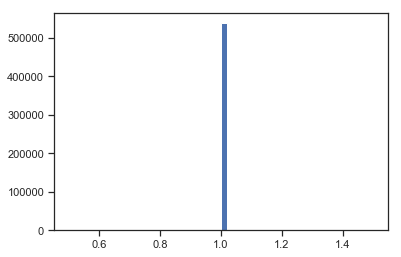

In [60]:
sc3 = Normalizer()
plt.hist(sc3.fit_transform(data[['Purchase']]),50)
plt.show()